In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

In [26]:
#Generate one-dimensional data with four different means and the same variance
np.random.seed(0)
n_samples = 500

# Means for the four clusters
means = [0, 5, 10, 15, 20]

# Variance (standard deviation squared) for all clusters
variance = 1

# Generate samples
data = []
for mean in means:
    data.append(np.random.normal(mean, np.sqrt(variance), n_samples // len(means)))

# Concatenate all data into a single array
data = np.concatenate(data).reshape(-1, 1)

In [27]:
data

array([[ 1.76405235e+00],
       [ 4.00157208e-01],
       [ 9.78737984e-01],
       [ 2.24089320e+00],
       [ 1.86755799e+00],
       [-9.77277880e-01],
       [ 9.50088418e-01],
       [-1.51357208e-01],
       [-1.03218852e-01],
       [ 4.10598502e-01],
       [ 1.44043571e-01],
       [ 1.45427351e+00],
       [ 7.61037725e-01],
       [ 1.21675016e-01],
       [ 4.43863233e-01],
       [ 3.33674327e-01],
       [ 1.49407907e+00],
       [-2.05158264e-01],
       [ 3.13067702e-01],
       [-8.54095739e-01],
       [-2.55298982e+00],
       [ 6.53618595e-01],
       [ 8.64436199e-01],
       [-7.42165020e-01],
       [ 2.26975462e+00],
       [-1.45436567e+00],
       [ 4.57585173e-02],
       [-1.87183850e-01],
       [ 1.53277921e+00],
       [ 1.46935877e+00],
       [ 1.54947426e-01],
       [ 3.78162520e-01],
       [-8.87785748e-01],
       [-1.98079647e+00],
       [-3.47912149e-01],
       [ 1.56348969e-01],
       [ 1.23029068e+00],
       [ 1.20237985e+00],
       [-3.8

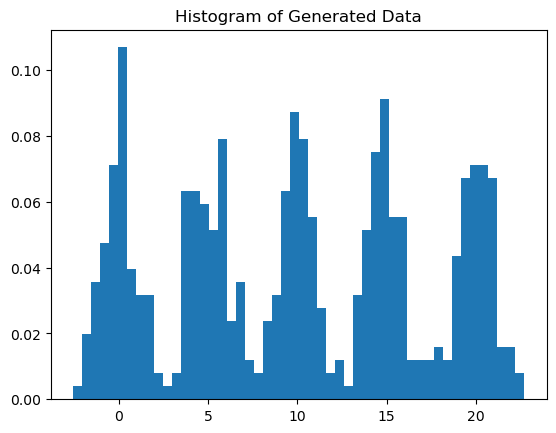

In [28]:
plt.hist(data, bins=50, density=True)
plt.title("Histogram of Generated Data")
plt.show()

In [163]:
X = np.array(data)

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


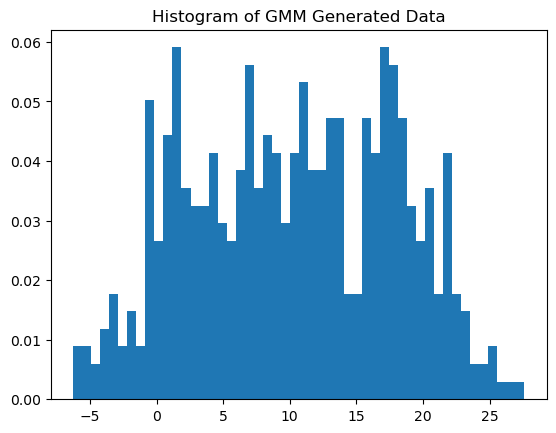

F:\anaconda\envs\transformer\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
F:\anaconda\envs\transformer\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


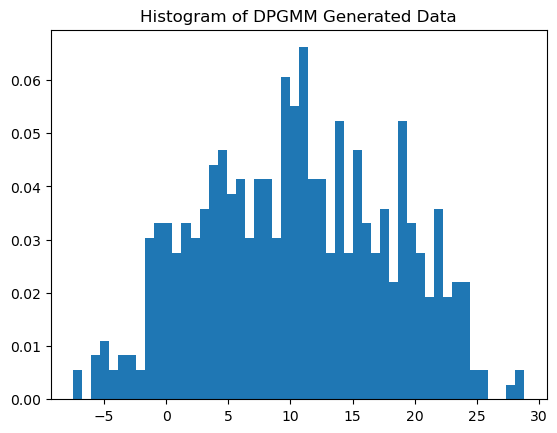

In [188]:
gmm = mixture.GaussianMixture(n_components=7, covariance_type="full",random_state=42).fit(X)
gmm_labels = gmm.predict(data)
score_gmm = gmm.score(data)
prob_gmm = gmm.predict_proba(data)
prams_gmm = gmm.get_params(deep=False)
stimulation_gmm = list(gmm.sample(n_samples=500))
plt.hist(stimulation_gmm[0], bins=50, density=True)
plt.title("Histogram of GMM Generated Data")
plt.show()

dpgmm = mixture.BayesianGaussianMixture(n_components=7, covariance_type="full",random_state=42,weight_concentration_prior_type="dirichlet_process",
        weight_concentration_prior=2, mean_precision_prior=0.1, mean_prior=np.mean(data).reshape(1,), degrees_of_freedom_prior=None, covariance_prior=None).fit(X)
dpgmm_labels = dpgmm.predict(data)
score_dpgmm = dpgmm.score(data)
stimulation_dpgmm = list(dpgmm.sample(n_samples=500))[0]
plt.hist(stimulation_dpgmm, bins=50, density=True)
plt.title("Histogram of DPGMM Generated Data")
plt.show()

In [ ]:
#For different set Score and Probability, selection number of components for GMM, all cluster share the same variance.

#Reversed case(generate data from fitted model)

#Try hierachical model GMM(DPGMM)

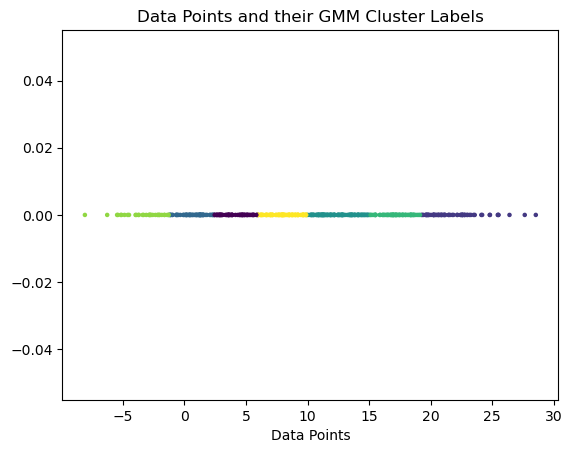

In [170]:
plt.scatter(data, np.zeros_like(data), c=gmm_labels, cmap='viridis', s=5)
plt.title("Data Points and their GMM Cluster Labels")
plt.xlabel("Data Points")
plt.show()

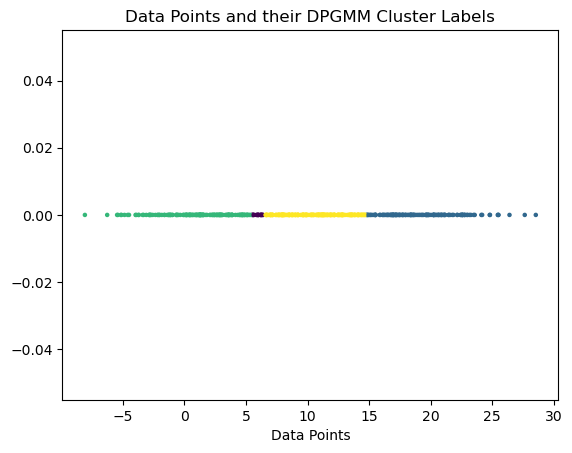

In [171]:
plt.scatter(data, np.zeros_like(data), c=dpgmm_labels, cmap='viridis', s=5)
plt.title("Data Points and their DPGMM Cluster Labels")
plt.xlabel("Data Points")
plt.show()

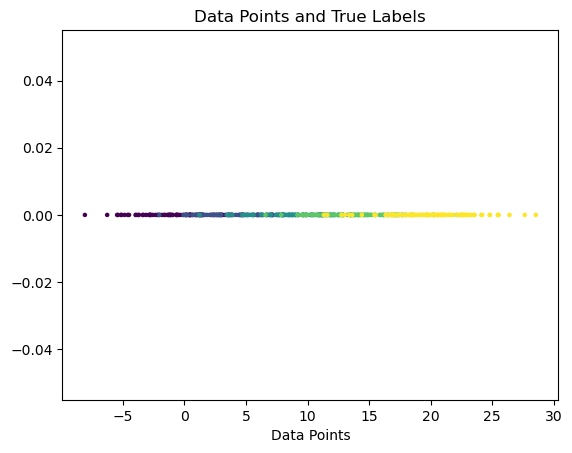

In [172]:
#real data
data_num = n_samples // len(means)
labels = np.array([0] * data_num + [1] * data_num + [2] * data_num + [3] * data_num + [4] * data_num)
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', s=5)
plt.title("Data Points and True Labels")
plt.xlabel("Data Points")
plt.show()

In [168]:
gmm_accuracy = adjusted_rand_score(labels, gmm_labels)
print(f"GMM Accuracy: {gmm_accuracy:.4f}")

dpgmm_process_accuracy = adjusted_rand_score(labels, dpgmm_labels)
print(f"DPGMM (Process) Accuracy: {dpgmm_process_accuracy:.4f}")

GMM Accuracy: 0.3505
DPGMM (Process) Accuracy: 0.2709
